In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Pehli jhalak dekho
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
gender_survival = titanic.groupby('Sex')['Survived'].mean()
print(gender_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


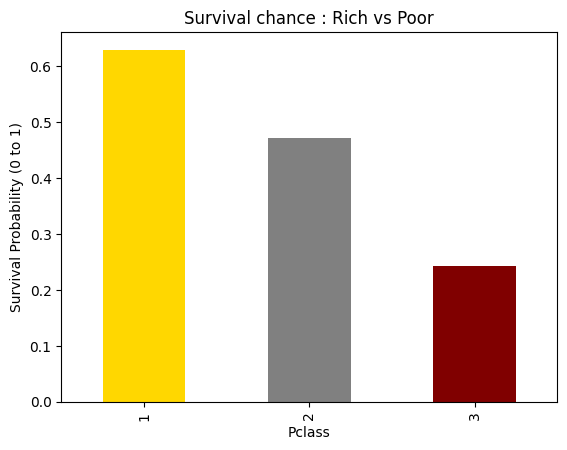

Axes(0.125,0.11;0.775x0.77)


In [5]:
gender_survival = titanic.groupby('Pclass')['Survived'].mean().plot(kind = 'bar', color = ['gold','grey','maroon'])
plt.title('Survival chance : Rich vs Poor')
plt.ylabel('Survival Probability (0 to 1)')
plt.show()           
           
print(gender_survival)

In [6]:
gender_survival = titanic.groupby(['Sex','Pclass'])['Survived'].mean()
print(gender_survival)

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


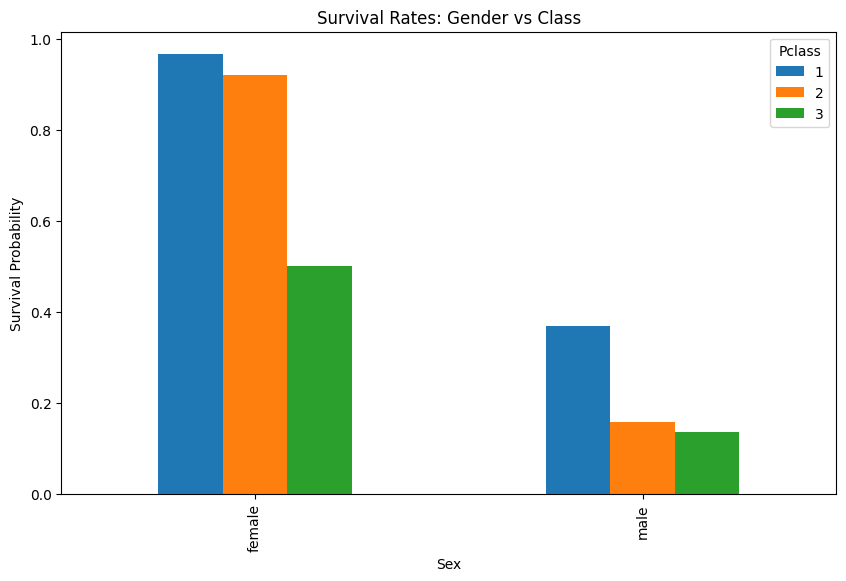

In [7]:
group_survival = titanic.groupby(['Sex','Pclass'])['Survived'].mean().unstack()
group_survival.plot(kind='bar', figsize=(10, 6))

plt.title('Survival Rates: Gender vs Class')
plt.ylabel('Survival Probability')
plt.show()

In [8]:
titanic['status'] = titanic['Age'].apply(lambda x: 'Child' if x<16 else 'Adult')
print(titanic.groupby('status')['Survived'].mean())

status
Adult    0.362624
Child    0.590361
Name: Survived, dtype: float64


In [9]:
old_age = titanic[titanic['Age']>60]
print(old_age['Name'].head(5))

33              Wheadon, Mr. Edward H
54     Ostby, Mr. Engelhart Cornelius
96          Goldschmidt, Mr. George B
116              Connors, Mr. Patrick
170         Van der hoef, Mr. Wyckoff
Name: Name, dtype: object


In [10]:
expensive_fare = titanic.sort_values(by = 'Fare' , ascending = False)
print(expensive_fare[['Name','Fare']].head(5))

                                   Name      Fare
679  Cardeza, Mr. Thomas Drake Martinez  512.3292
258                    Ward, Miss. Anna  512.3292
737              Lesurer, Mr. Gustave J  512.3292
88           Fortune, Miss. Mabel Helen  263.0000
438                   Fortune, Mr. Mark  263.0000


In [11]:
titanic_age = titanic['Age'].mean()
titanic_age

np.float64(29.69911764705882)

In [12]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

titanic['Sex'] = titanic['Sex'].map({ 'male':1, 'female':0})

print(titanic[['Name','Age','Sex']].head())

                                                Name   Age  Sex
0                            Braund, Mr. Owen Harris  22.0    1
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0    0
2                             Heikkinen, Miss. Laina  26.0    0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0    0
4                           Allen, Mr. William Henry  35.0    1


In [13]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from sklearn.tree import DecisionTreeClassifier

feature = ['Pclass','Sex','Age','Fare']
x = titanic[feature]

y = titanic['Survived']
Model =  DecisionTreeClassifier()

Model.fit(x,y)
print("Training Complete! Maine Titanic ka pattern seekh liya hai. 🤖")

Training Complete! Maine Titanic ka pattern seekh liya hai. 🤖


In [15]:
prince_poor = [[3,0,24,10]]

prince_rich = [[1,0,24,500]]

pred_poor = Model.predict(prince_poor)
pred_rich = Model.predict(prince_rich)

print("Agar Prince 3rd Class mein hota (0=Died, 1=Survived):", pred_poor)
print("Agar Prince 1st Class mein hota (0=Died, 1=Survived):", pred_rich)

Agar Prince 3rd Class mein hota (0=Died, 1=Survived): [0]
Agar Prince 1st Class mein hota (0=Died, 1=Survived): [1]


C:\Users\Prince\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Prince\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


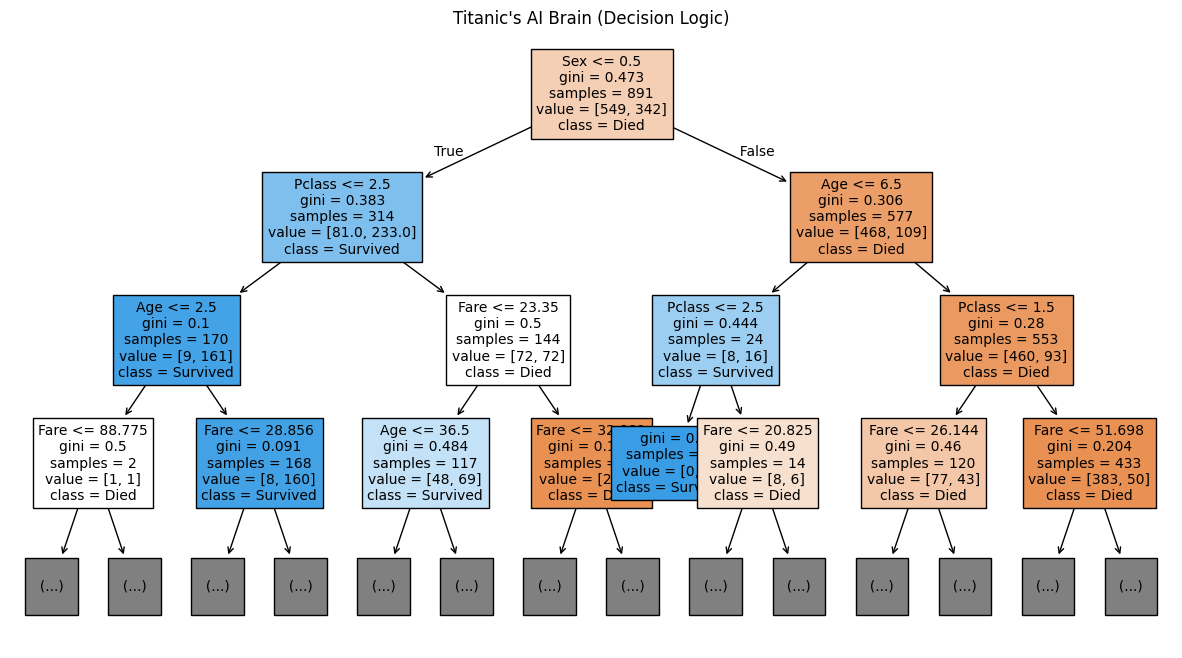

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Tree ka chitra banao
plot_tree(Model, 
          feature_names=['Pclass', 'Sex', 'Age', 'Fare'], 
          class_names=['Died', 'Survived'], 
          filled=True, 
          max_depth=3,   # Sirf top 3 levels dikhao
          fontsize=10)

plt.title("Titanic's AI Brain (Decision Logic)")
plt.show()

In [17]:
from sklearn.metrics import accuracy_score

prediction = Model.predict(x)
score = accuracy_score(y,prediction)
print('Models Accuracy',score*100,"%")

Models Accuracy 97.97979797979798 %


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
real_model = DecisionTreeClassifier()
real_model.fit(x_train,y_train)
real_prediction = real_model.predict(x_test)
real_score = accuracy_score(y_test,real_prediction)
print("Asli Accuracy (Test Score):", real_score * 100, "%")

Asli Accuracy (Test Score): 75.41899441340783 %
